# 1. Import and Install Dependencies

In [9]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached tensorflow_gpu-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached wrapt-1.12.1-py3-none-any.whl

ERROR: Cannot uninstall six 1.16.0, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps six==1.16.0'.



  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
video_source = 'beautiful.mp4'
cap = cv2.VideoCapture(video_source)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    

        # Read feed
    ret, frame = cap.read()

        # Make detections
    image, results = mediapipe_detection(frame, holistic)
    print(results)
        
        # Draw landmarks
    draw_styled_landmarks(image, results)

        # Show to screen
    cv2.imshow('OpenCV Feed', image)

        # Break gracefully
    
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


mediapipe.python.solution_base.SolutionOutputs

In [7]:
video_source = 'MVI_3720.MOV'
cap = cv2.VideoCapture(video_source)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
cap.release()
cv2.destroyAllWindows()

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

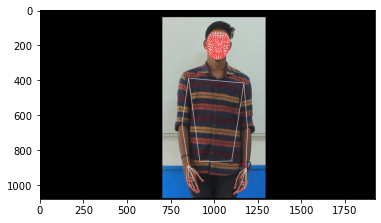

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.53623337,  0.18780774, -0.50979048, ...,  0.45010087,
        0.93717968,  0.00717495])

In [18]:
468*3+33*4+21*3+21*3

1662

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.53623337,  0.18780774, -0.50979048, ...,  0.45010087,
        0.93717968,  0.00717495])

# 4. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['beautiful','blind','deaf','happy','loud','quiet','sad','ugly'])

# Thirty videos worth of data
no_sequences = 15

# Videos are going to be 30 frames in length
sequence_length = 78

In [22]:
l=len(actions)
l

8

In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [24]:
vid_arr = ['beautiful.mp4','blind.mp4','deaf.mp4','happy.mp4','loud.mp4','quiet.mp4','sad.mp4','ugly.mp4']

In [25]:
for i in range(l):
    print (vid_arr[i])
    print (actions[i])
    

beautiful.mp4
beautiful
blind.mp4
blind
deaf.mp4
deaf
happy.mp4
happy
loud.mp4
loud
quiet.mp4
quiet
sad.mp4
sad
ugly.mp4
ugly


In [26]:
for i in range(l):
    cap = cv2.VideoCapture(vid_arr[i])
# Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
        # NEW LOOP
        # Loop through actions
        
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                    # Read feed
                ret, frame = cap.read()

                    # Make detections
                image, results = mediapipe_detection(frame, holistic)
                    #                 print(results)

                    # Draw landmarks
                draw_styled_landmarks(image, results)
                
                    # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(actions[i], sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(actions[i], sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                    # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, actions[i], str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                    # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'beautiful': 0,
 'blind': 1,
 'deaf': 2,
 'happy': 3,
 'loud': 4,
 'quiet': 5,
 'sad': 6,
 'ugly': 7}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(120, 78, 1662)

In [33]:
np.array(labels).shape

(120,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(120, 78, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [38]:
y_test.shape

(6, 8)

# 7. Build and Train LSTM Neural Network

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [2]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

NameError: name 'os' is not defined

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(78,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
res = [.7, 0.2, 0.1]

In [43]:
actions[np.argmax(res)]

'beautiful'

In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
4/4 [==============================] - 2s 146ms/step - loss: 654.6502 - categorical_accuracy: 0.1053
Epoch 2/2000
4/4 [==============================] - 1s 149ms/step - loss: 1439.5056 - categorical_accuracy: 0.1140
Epoch 3/2000
4/4 [==============================] - 1s 151ms/step - loss: 516.2418 - categorical_accuracy: 0.1228
Epoch 4/2000
4/4 [==============================] - 1s 151ms/step - loss: 78.8375 - categorical_accuracy: 0.1140
Epoch 5/2000
4/4 [==============================] - 1s 156ms/step - loss: 117.4533 - categorical_accuracy: 0.0965
Epoch 6/2000
4/4 [==============================] - 1s 155ms/step - loss: 488.4541 - categorical_accuracy: 0.1053
Epoch 7/2000
4/4 [==============================] - 1s 159ms/step - loss: 2240.7822 - categorical_accuracy: 0.1053
Epoch 8/2000
4/4 [==============================] - 1s 156ms/step - loss: 1380.1395 - categorical_accuracy: 0.0614
Epoch 9/2000
4/4 [==============================] - 1s 158ms/step - loss: nan - catego

4/4 [==============================] - 1s 155ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 150/2000
4/4 [==============================] - 1s 156ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 151/2000
4/4 [==============================] - 1s 166ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 152/2000
4/4 [==============================] - 1s 161ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 153/2000
4/4 [==============================] - 1s 168ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 154/2000
4/4 [==============================] - 1s 157ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 155/2000
4/4 [==============================] - 1s 158ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 156/2000
4/4 [==============================] - 1s 156ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 157/2000
4/4 [==============================] - 1s 158ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 158/2000
4

Epoch 223/2000
4/4 [==============================] - 1s 184ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 224/2000
4/4 [==============================] - 1s 169ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 225/2000
4/4 [==============================] - 1s 171ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 226/2000
4/4 [==============================] - 1s 154ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 227/2000
4/4 [==============================] - 1s 153ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 228/2000
4/4 [==============================] - 1s 161ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 229/2000
4/4 [==============================] - 1s 162ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 230/2000
4/4 [==============================] - 1s 158ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 231/2000
4/4 [==============================] - 1s 159ms/step - loss: nan - categorical_accuracy: 0.1316
E

Epoch 370/2000
4/4 [==============================] - 1s 162ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 371/2000
4/4 [==============================] - 1s 165ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 372/2000
4/4 [==============================] - 1s 161ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 373/2000
4/4 [==============================] - 1s 158ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 374/2000
4/4 [==============================] - 1s 159ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 375/2000
4/4 [==============================] - 1s 154ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 376/2000
4/4 [==============================] - 1s 157ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 377/2000
4/4 [==============================] - 1s 158ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 378/2000
4/4 [==============================] - 1s 161ms/step - loss: nan - categorical_accuracy: 0.1316
E

Epoch 517/2000
4/4 [==============================] - 1s 156ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 518/2000
4/4 [==============================] - 1s 158ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 519/2000
4/4 [==============================] - 1s 159ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 520/2000
4/4 [==============================] - 1s 159ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 521/2000
4/4 [==============================] - 1s 160ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 522/2000
4/4 [==============================] - 1s 159ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 523/2000
4/4 [==============================] - 1s 163ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 524/2000
4/4 [==============================] - 1s 158ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 525/2000
4/4 [==============================] - 1s 152ms/step - loss: nan - categorical_accuracy: 0.1316
E

Epoch 664/2000
4/4 [==============================] - 1s 158ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 665/2000
4/4 [==============================] - 1s 156ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 666/2000
4/4 [==============================] - 1s 149ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 667/2000
4/4 [==============================] - 1s 148ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 668/2000
4/4 [==============================] - 1s 156ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 669/2000
4/4 [==============================] - 1s 155ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 670/2000
4/4 [==============================] - 1s 159ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 671/2000
4/4 [==============================] - 1s 156ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 672/2000
4/4 [==============================] - 1s 160ms/step - loss: nan - categorical_accuracy: 0.1316
E

Epoch 811/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 812/2000
4/4 [==============================] - 1s 152ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 813/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 814/2000
4/4 [==============================] - 1s 152ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 815/2000
4/4 [==============================] - 1s 153ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 816/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 817/2000
4/4 [==============================] - 1s 144ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 818/2000
4/4 [==============================] - 1s 154ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 819/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
E

Epoch 958/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 959/2000
4/4 [==============================] - 1s 149ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 960/2000
4/4 [==============================] - 1s 151ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 961/2000
4/4 [==============================] - 1s 156ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 962/2000
4/4 [==============================] - 1s 151ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 963/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 964/2000
4/4 [==============================] - 1s 144ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 965/2000
4/4 [==============================] - 1s 151ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 966/2000
4/4 [==============================] - 1s 148ms/step - loss: nan - categorical_accuracy: 0.1316
E

4/4 [==============================] - 1s 149ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1105/2000
4/4 [==============================] - 1s 144ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1106/2000
4/4 [==============================] - 1s 143ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1107/2000
4/4 [==============================] - 1s 151ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1108/2000
4/4 [==============================] - 1s 147ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1109/2000
4/4 [==============================] - 1s 148ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1110/2000
4/4 [==============================] - 1s 152ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1111/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1112/2000
4/4 [==============================] - 1s 151ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 11

4/4 [==============================] - 1s 152ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1251/2000
4/4 [==============================] - 1s 157ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1252/2000
4/4 [==============================] - 1s 155ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1253/2000
4/4 [==============================] - 1s 152ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1254/2000
4/4 [==============================] - 1s 156ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1255/2000
4/4 [==============================] - 1s 152ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1256/2000
4/4 [==============================] - 1s 149ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1257/2000
4/4 [==============================] - 1s 155ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1258/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 12

4/4 [==============================] - 1s 154ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1397/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1398/2000
4/4 [==============================] - 1s 148ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1399/2000
4/4 [==============================] - 1s 153ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1400/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1401/2000
4/4 [==============================] - 1s 154ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1402/2000
4/4 [==============================] - 1s 144ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1403/2000
4/4 [==============================] - 1s 145ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1404/2000
4/4 [==============================] - 1s 151ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 14

4/4 [==============================] - 1s 151ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1543/2000
4/4 [==============================] - 1s 152ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1544/2000
4/4 [==============================] - 1s 148ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1545/2000
4/4 [==============================] - 1s 143ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1546/2000
4/4 [==============================] - 1s 147ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1547/2000
4/4 [==============================] - 1s 149ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1548/2000
4/4 [==============================] - 1s 151ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1549/2000
4/4 [==============================] - 1s 153ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 1550/2000
4/4 [==============================] - 1s 150ms/step - loss: nan - categorical_accuracy: 0.1316
Epoch 15

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 50, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [45]:
res = model.predict(X_test)

In [1]:
actions[np.argmax(res[0])]

NameError: name 'actions' is not defined

In [47]:
actions[np.argmax(y_test[2])]

'Blue'

# 9. Save Weights

In [48]:
model.save('action.h5')

In [58]:
del model

In [49]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [1, 0]],

       [[0, 2],
        [0, 1]],

       [[2, 0],
        [1, 0]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

0.3333333333333333

# 11. Test in Real Time

In [55]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-50:]
        
        if len(sequence) == 50:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
           # if res[np.argmax(res)] > threshold: 
            #    if len(sentence) > 0: 
            #        if actions[np.argmax(res)] != sentence[-1]:
             #           sentence.append(actions[np.argmax(res)])
              #  else:
              #      sentence.append(actions[np.argmax(res)])

          #  if len(sentence) > 5: 
          #      sentence = sentence[-5:]

            # Viz probabilities
         #   image = prob_viz(res, actions, image, colors)
            
       # cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
       # cv2.putText(image, ' '.join(sentence), (3,30), 
        #               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>


<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<clas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Blue
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<cl

Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Green
<class 'mediapipe.python.solution_base.SolutionOu

KeyboardInterrupt: 

In [80]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [81]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [82]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [83]:
len(sequence)

TypeError: object of type 'int' has no len()

In [84]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [85]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [86]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [87]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

ValueError: in user code:

    File "C:\Users\pra23\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\pra23\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\pra23\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\pra23\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\pra23\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\pra23\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 50, 1662), found shape=(None, 30, 1662)


In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)